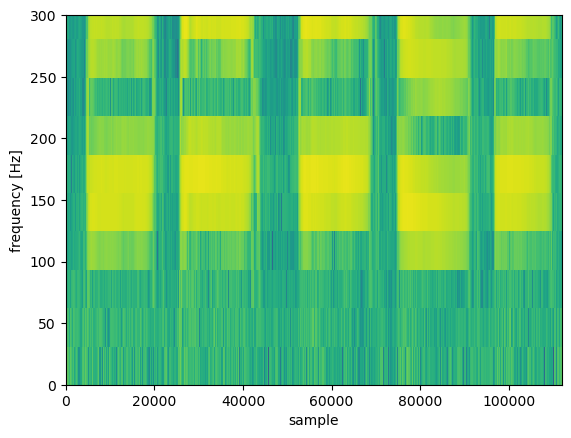

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

SR = 16000

x, _ = librosa.load('audio/aiueo-long.wav', sr=SR)

# フレームサイズ
size_frame = 512
hamming_window = np.hamming(size_frame)

# シフトサイズ
size_shift = 16000 / 100  # 10 msec

spectrogram = []

for i in np.arange(0, len(x) - size_frame, size_shift):
  idx = int(i)
  x_frame = x[idx: idx + size_frame]

  # 窓掛けしたデータをFFT
  fft_spec = np.fft.rfft(x_frame * hamming_window)

  # 振幅スペクトルを対数化
  fft_log_abs_spec = np.log(np.abs(fft_spec))

  # 配列に保存
  spectrogram.append(fft_log_abs_spec)

fig = plt.figure()

plt.xlabel('sample')
plt.ylabel('frequency [Hz]')
plt.imshow(
    np.flipud(np.array(spectrogram).T),
    extent=[0, len(x), 0, SR / 2],
    aspect='auto',
    interpolation='nearest'
)

plt.ylim([0, 300])
plt.show()